# US Biodiversity Project

The purpose of this project is to take some biodiversity data collected externally and explore it using summary statistics and visualisations.

The data will first need to be examined, cleaned, and potentially modified to be able to work with it.

Exploring the files provided, we have two files; observations and species info. 

The observations file contains information on the number of observations of a particular species in a US national park. It records the frequency and park where it was seen.

The species info contains information on the specific species, namely its catgeory, scientific and common name, as well as conservation status.

## Loading the data

First, the data will be loaded and examined to get an idea of what to expect from the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

obs = pd.read_csv("observations.csv") #load observation data 
spec = pd.read_csv("species_info.csv") #load observation data

print(obs.head())
print(spec.head()) 

#loading the first 5 rows of each data set.

print(obs.info())
print(spec.info())

#printing the info of each table to find out the datatypes and identify any missing data.

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

# Initial Impressions

Looking at the data above, the observations table does not seem to have missing data and the observations column in particular is in the correct format of an integer. 

The species info table has 5824 species on record, it is not known is any of these are repeats for the time being. Of note is the conservation status column, of which only 191 non null values exist. Meaning the majority of the species it is unknown what their conservation status is. Filling in the non null values will be one of the changes to the data I will do to make it more readable. Secondly, it appears the common names column contains more than one common name and may need to be considered during the analysis.

## Initial data exploration

Next, I will look at the initial statistics of the data such as the number of unique entries with the intention of using this to find duplicated columns. As well as look into the conservation status and how the null values could be filled in.

In [3]:
print(obs.park_name.nunique()) #counting the number of unique national parks

#There appears to only be 4 national parks recorded in the data 

print(spec.category.nunique()) #counting the number of unique categories of species

#There appears to be 7 unique categories of species

print(spec.scientific_name.nunique()) #counting the number of unique species by scientific name

#There are only 5541 unique species, meaning there are some duplicates that could be dropped.

print(spec.conservation_status.unique()) #looking at the different types of conservation status

#There appears to be 4 distinct categories; Species of concern, endangered, threatened and in recovery. 
#Those with null values may be species who are not of concern and could be indentified as such.

spec = spec.drop_duplicates(subset = ["scientific_name"]) #dropping the duplicate species 
print(spec.info()) #checking that the number of unique species aligns with the number of species recorded by scientific name.
print(spec.scientific_name.nunique())

spec = spec.fillna(value = {"conservation_status":"No Concern"}) #replacing null values with No Concern
print(spec.conservation_status.unique()) #Checking that all null values have been replaced with No Concern.



4
7
5541
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB
None
5541
['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Exploring the Species Table

Now that the data has been wrangled in a sense, I will now do some deeper exploration of the species table. I have the following questions.

- What is the distribution of the species categories, are more of certain types of species recorded than others?
- What is the distribution of conservation status markers?
- Are certain categories of animals more likely to be threatened than others?

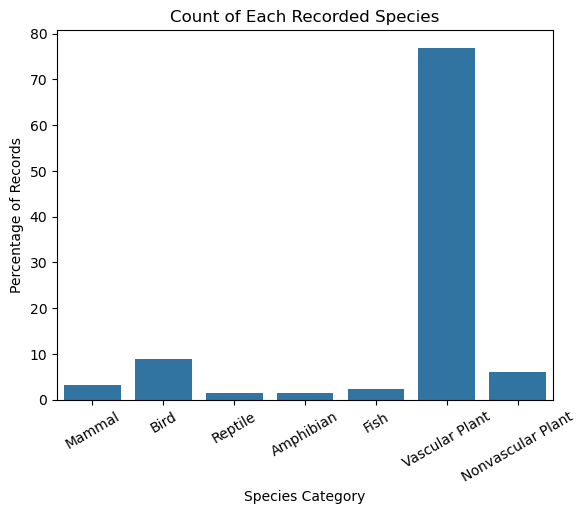

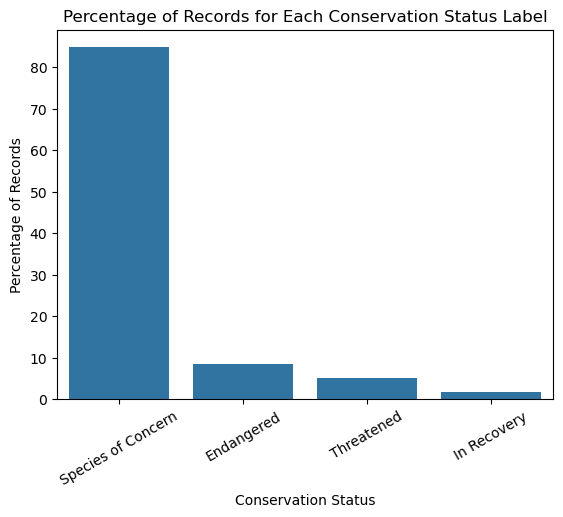

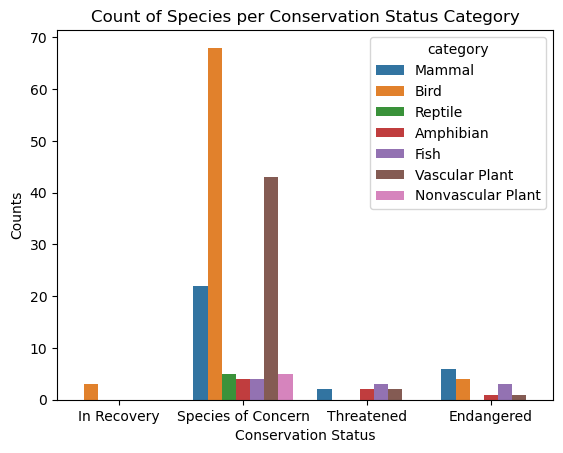

<Figure size 640x480 with 0 Axes>

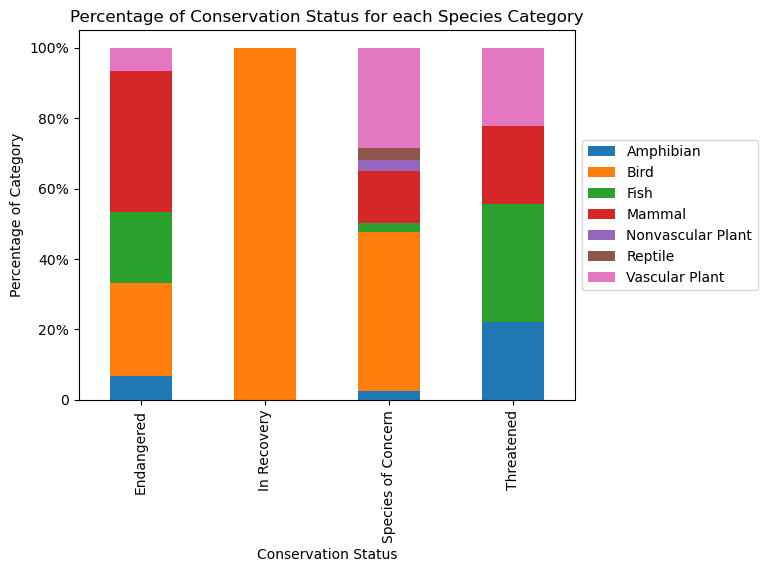

<Figure size 640x480 with 0 Axes>

In [157]:
sns.countplot(data = spec, x = "category", stat = "percent")
plt.xlabel("Species Category")
plt.ylabel("Percentage of Records")
plt.title("Count of Each Recorded Species")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

#Looking at the count plot, we can see thayt the majority of the data recorded is about vascular plants. This could be due to the shear number of
# plants that could be recorded across the national parks compared to other species. The bar plot has used a percentage modifier to better see the 
# proportions.

spec_concern = spec[spec.conservation_status != "No Concern"] #limiting to only species which are of at least some concern
# print(spec_concern.conservation_status.unique()) #checking 

spec_concern = spec_concern[["category", "conservation_status"]] #limiting the data to just the category and conservation status columns

sns.countplot(data = spec_concern, x = "conservation_status", stat = "percent")
plt.xlabel("Conservation Status")
plt.ylabel("Percentage of Records")
plt.title("Percentage of Records for Each Conservation Status Label")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

#creating a count plot of the conservation status category broken down by species category
sns.countplot(data = spec_concern, x = "conservation_status", hue = "category", order = ["In Recovery", "Species of Concern", "Threatened", "Endangered"])
plt.xlabel("Conservation Status")
plt.ylabel("Counts")
plt.title("Count of Species per Conservation Status Category")
plt.show()
plt.clf()

spec_concern_pivot = spec_concern.pivot_table(index = ["conservation_status"], columns = ["category"], aggfunc = lambda x : len(x), fill_value = 0, margins = True)
spec_concern_pivot = spec_concern_pivot.div(spec_concern_pivot.iloc[:,-1], axis = 0)
spec_concern_pivot = spec_concern_pivot.drop(labels = "All", axis = 0)
spec_concern_pivot = spec_concern_pivot.drop(labels = "All", axis = 1) #creating a pivot table of the data, setting values to percentages, then dropping the total columns.

# print(spec_concern_pivot) #checking the result

ax1 = spec_concern_pivot.plot.bar(stacked = True) #plotting the stacked bar chart.
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) #setting the legend outside the bar chart
ax1.set_xlabel("Conservation Status")
ax1.set_ylabel("Percentage of Category")
ax1.set_title("Percentage of Conservation Status for each Species Category") #setting labels and y ticks
ax1.set_yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ["0", "20%", "40%", "60%", "80%", "100%"])
plt.show()
plt.clf()


# Conservation Status Analysis

Considering the plots above, we can see that the majority of species that have a recorded conservation status are plant species, particularly vascular plants. These make up over 70% of the recorded species. Reptiles and Amphibians are both roughly 2% of recorded species, closely followed by fish. This could point to a wider variety of plant species and variations in the national parts in comparison to animal type species.

The second plot looks at the distributions of the species that have a recorded conservation status. Over 80% of species are recorded as "Of Concern", making up a significant majority. There are roughly 8% of species recorded as being endangered, followed by 6% as threatened, and ~2% as in recovery.

Looking at the third plot which breaks down each conservation status cetegory by species we can see that the majority of the species with a label are labeled as species of concern by a significant margin. This is closely followed by endangered, then threatened and finally in recovery. The fourth plot considers the percentage distribution of each species in each conservation category. This makes it easier to compare each species within each category and to see how they compare with the analysis below.

Something to note about this third plot is that despite birds only making up roughly 10% of recorded species, they are by far the most likely species to have any sort of conservation status label. There are almost 70 recorded bird species that are labeled as "of concern", followed by just over 40 vascular plant species, and around 22 mammal species. The other categories have less than 5 recorded as "of concern". Amphibians and fish are the least likely to be recorded as of concern, with reptiles and non-vascular plants closely following them.

Looking at the threatened column, only 4 species are labelled as threatened; mammal,amphibian, fish, and vasular plant, all with 3 of less recorded species. Similarly, the endangered column is only made up of 5 species, with Mammals and birds likely to be labelled as Endangered. 

Finally considered the in recovery column, only birds are labelled as in recovery, showing that there is still work to be done to reduce the number of species who are at risk.



# Exploring the Observations Table

The next table to be explored is the observation table. This table contains the number of observations for species across 4 national parks. Some questions I would like to consider.

- What is the most and least spotted species in each national park?
- Which national park has the most sightings?
- What is the distribution of species type across each national park?

To consider the last question it would be a good idea to add a category column to the observation table so that we are able to look at the distribution of species by category.

In [172]:
obs_joined = obs.merge(spec, on = "scientific_name") #merging data on scientific name to add conservation status and catgeory to data
print(obs_joined.info()) #checking data

obs_joined_ordered = obs_joined[["category", "conservation_status", "scientific_name", "park_name", "observations"]] #removing common name category and reordering
print(obs_joined_ordered.head()) #checking data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23296 non-null  object
 1   park_name            23296 non-null  object
 2   observations         23296 non-null  int64 
 3   category             23296 non-null  object
 4   common_names         23296 non-null  object
 5   conservation_status  23296 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None
         category conservation_status           scientific_name  \
0  Vascular Plant          No Concern        Vicia benghalensis   
1          Mammal          No Concern            Neovison vison   
2  Vascular Plant          No Concern         Prunus subcordata   
3  Vascular Plant          No Concern      Abutilon theophrasti   
4  Vascular Plant          No Concern  Githopsis specularioides   

                             park_name  ob